<a href="https://colab.research.google.com/github/naokityokoyama/NLP/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
resenha = pd.read_csv('/content/imdb-reviews-pt-br.csv')

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
X= resenha.text_pt
y= resenha.sentiment

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state=42)

In [ ]:
modelo = LogisticRegression()
modelo.fit(X_treino, y_treino)

In [ ]:
modelo.score(X_teste, y_teste)

NotFittedError: ignored

## Conhecendo a semantica

In [ ]:
print ('negativa \n' )
resenha.text_pt[189]

negativa 



'Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'

In [ ]:
print ('positivo \n' )
resenha.text_pt[4002]

positivo 



'Esta é uma versão de comédia de "Strangers on a Train". Isso funciona muito bem. Eu sou um graduador duro, então a classificação 3 reflete principalmente os personagens e enredo. As performances são extremamente boas, todas elas. Claro, as duas estrelas, DeVito e Crystal, brilham mais. Cada artista age bem o suficiente para jogar fora. A comédia funciona em um nível pouco aquém do pastelão. Os personagens DeVito funcionam melhor quando depravados. Seu personagem, retratado como um hack da escrita, provavelmente seria mais real se ele fosse publicado e elogiado, tanto quanto a maioria dos hacks são. Seu personagem teria, na vida real, um ótimo agente e múltiplas solicitações. Os personagens são unidimensionais, o que é bom em comédia. Mas o personagem dos cristais não está escrito muito bem. Seu desejo de matar o "moma" de repente não faz sentido algum. Parece uma tentativa lamentável de humor. As tentativas lamentáveis \u200b\u200bnão são muito frequentes e o filme flui bastante bem.'

## Balanceamento do dados

In [ ]:
total = resenha['sentiment'].value_counts().sum()

In [ ]:
neg = resenha['sentiment'].value_counts()[0]
pos = resenha['sentiment'].value_counts()[1]

In [ ]:
print (f'negativos {neg/total}\n')
print (f'positivos {pos/total}')

negativos 0.5007177662306153

positivos 0.49928223376938474


In [ ]:
#dados balanceados

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


## Criar uma coluna binaria

In [ ]:
trocar = {'neg': 0, 'pos':1}

In [ ]:
resenha['classificacao'] = resenha.sentiment.map(trocar)

In [ ]:
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


## bag of words 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
# comando para criar as features
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [ ]:
bag_of_words #repare que retorna uma matriz sparse que é cheia de zero

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
print (bag_of_words)

  (0, 0)	1
  (0, 3)	1
  (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 3)	1
  (1, 1)	1
  (1, 2)	1


In [ ]:
# SparseDataframe

In [ ]:
matrix_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [ ]:
matrix_sparse

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## Vamos conhecer agora o nosso dataset

In [ ]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
bag_of_words.shape

(49459, 156923)

In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
bag_of_words.shape

(49459, 50)

## Criando novamento o modelo 

In [ ]:
X = bag_of_words

y = resenha['classificacao']


(49459, 50)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=42)

In [ ]:
modelo = LogisticRegression()
modelo.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Score = modelo.score(X_teste, y_teste)
Score

0.6583097452486858

In [ ]:
def classificar_texto(X, y):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(X)
  X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, y, random_state=42)
  modelo = LogisticRegression()
  modelo.fit(X_treino, y_treino)
  return modelo.score(X_teste, y_teste)
  


## Word Cloud

https://amueller.github.io/word_cloud/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
!pip install wordcloud 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
todas_palavras1 = [texto for texto in resenha.text_pt] # esse list comprehensions fez com que todo o texto ficasse em uma unica variavel 
                                                          # porem apenas juntou mas é como se fosse um monte de lista em uma unica vareavel 
todas_palavras1[0]
len(todas_palavras1)
#type (todas_palavras1)

49459

In [ ]:
todas_palavras2 = ' '.join([texto for texto in resenha.text_pt]) # ' ' ao final de cada frase vai ter um join e assim separar tudo em caracter

In [ ]:
todas_palavras2[0:4]
len(todas_palavras2)
#type (todas_palavras2)

63448424

In [ ]:
todas_palavras = todas_palavras2

In [ ]:
#construir a wordcloud
wordcloud = WordCloud()
nuvem_palavras = wordcloud.generate(todas_palavras)

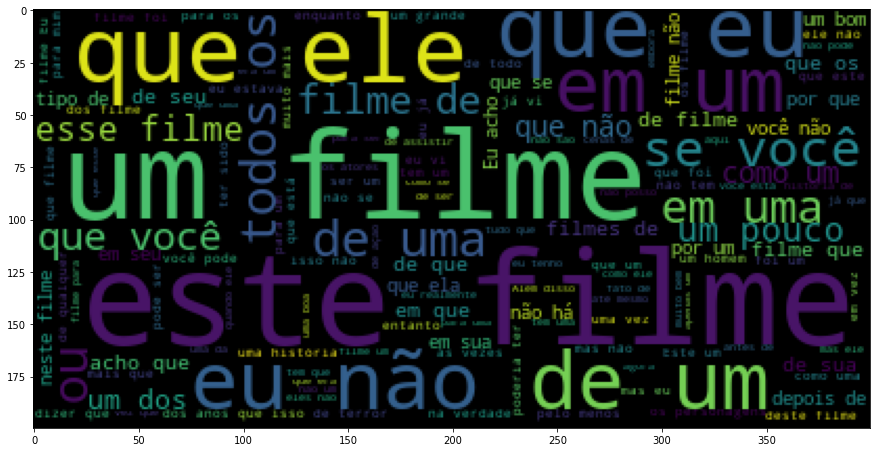

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras)

In [ ]:
#melhorando a visualização do word cloud 
wordcloud = WordCloud(width=800, height=500, max_font_size=110)
nuvem_palavras = wordcloud.generate(todas_palavras)

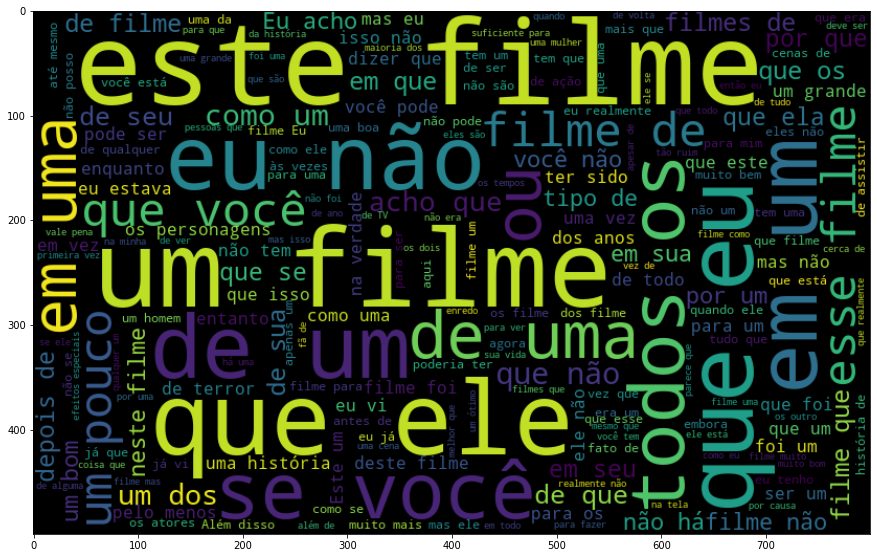

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras, interpolation='bilinear') #interpolation melhora a vizualização 

In [ ]:
# retirando o bigrama (frequencia das palavras mais usadas )
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False)
nuvem_palavras= wordcloud.generate(todas_palavras)

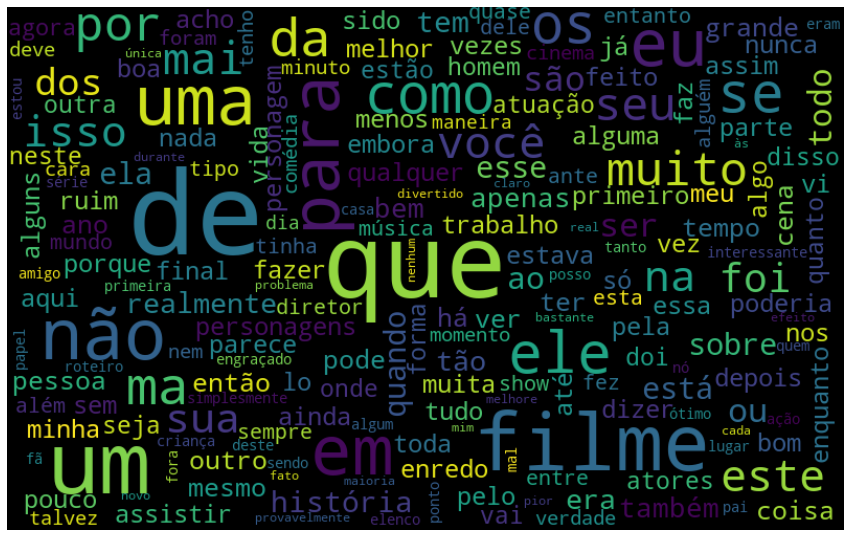

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off'); #retirando as labels do x e y 

## função query do pandas

In [ ]:
positivo = resenha.query("sentiment== 'pos'")
negativo = resenha.query("sentiment== 'neg'")

## Wordcloud positivo e negativo

In [ ]:
palavras_positivas = ' '.join([texto for texto in positivo.text_pt])
palavras_negativas = ' '.join([texto for texto in negativo.text_pt])

In [ ]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False)
nuvem_palavras_neg= wordcloud.generate(palavras_negativas)

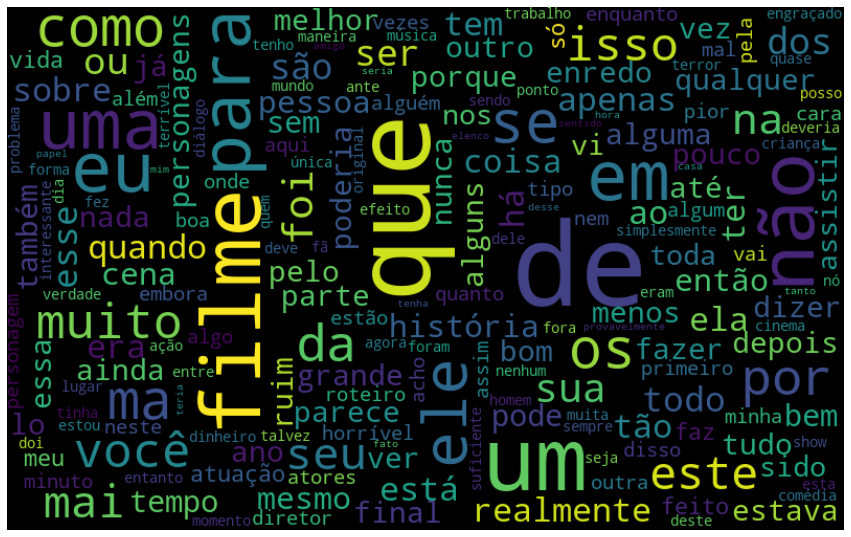

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras_neg, interpolation='bilinear')
plt.axis('off');

In [ ]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False)
nuvem_palavras_pos= wordcloud.generate(palavras_positivas)

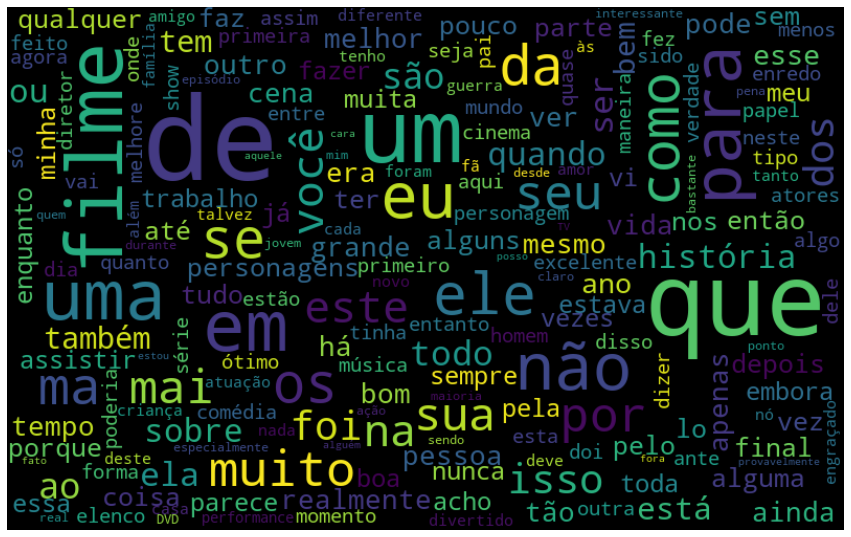

In [ ]:
fig=plt.figure(figsize=(15,15))
plt.imshow(nuvem_palavras_pos, interpolation='bilinear')
plt.axis('off');

## NLTK - NaturaToolkit

In [ ]:
pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('all')

## Frequencia 

In [ ]:
frequencia = nltk.FreqDist

In [ ]:
frase = ['um filme ruim', 'um filme bom']

In [ ]:
frequencia(frase)

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

## Tolkerização

In [ ]:
from nltk import tokenize

In [ ]:
frase2 = 'bem vindo ao mundo do NLP'

In [ ]:
token = tokenize.WhitespaceTokenizer() #separado por espaço em branco Whitespace

In [ ]:
token.tokenize(frase2)

['bem', 'vindo', 'ao', 'mundo', 'do', 'NLP']

In [ ]:
token_frase = token.tokenize(todas_palavras)

In [ ]:
frequencia = nltk.FreqDist(token_frase)
type (frequencia)

nltk.probability.FreqDist

## Criando Dataframe 

In [ ]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())}) #frequencia era um dict entao chamou por key e value

In [ ]:
df_frequencia

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [ ]:
df_frequencia.nlargest(columns='Frequencia', n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [ ]:
df_frequencia.nsmallest(columns='Frequencia', n=10)

,Palavra,Frequencia
44,Costers,1
143,"aproveitados,",1
145,comprovando,1
159,Ricochet,1
271,testas.,1
301,"billies""",1
370,"gostassem,",1
374,"mop-top,",1
404,ice-t,1
422,entrego,1


## Graficando

In [ ]:
import seaborn as sns

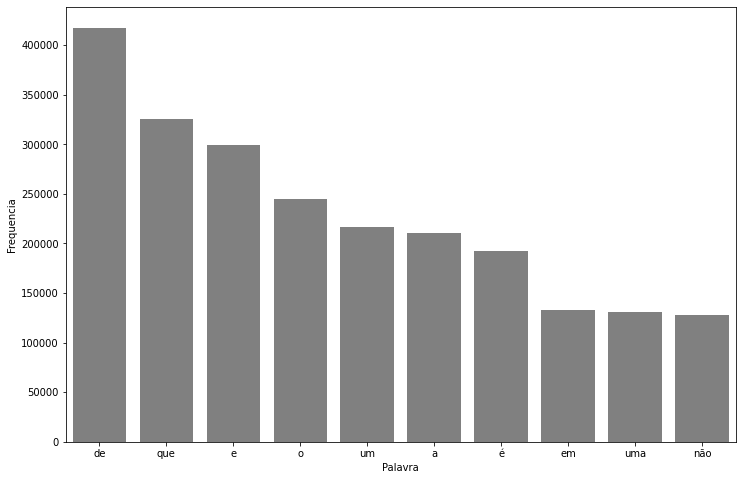

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_frequencia.nlargest(columns='Frequencia', n=10), x='Palavra', y='Frequencia', color='gray')

## Stop Word 

são palavras irrelevantes para NLP

**ainda tentando elaborar um script para retirar as palavras do dataset**

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [ ]:
len(palavras_irrelevantes)

204

In [ ]:
palavras_irrelevantes

In [ ]:
resenha.text_pt

In [ ]:
frase_processada = []
for i in resenha.text_pt:
  nova_frase = []
  palavras_texto = token.tokenize(i)
  for j in palavras_texto:
    if j not in palavras_irrelevantes:
      nova_frase.append(j)
    frase_processada.append(' '.join(nova_frase))  

In [ ]:
resenha['nova'] = frase_processada

ValueError: ignored

In [ ]:
frase1 =  []

for i in resenha.text_pt:
  novo_token = token.tokenize(i)
  frase1.append(novo_token)

In [ ]:
frase_final = []
for j in frase1:
  if j not in palavras_irrelevantes:
    frase_final.append(j)

In [ ]:
frase_final

type (frase_final)

list